In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datasets = ['BDG-2', 'Electricity', 'Buildings-900K-test']

In [3]:
def load_results(datasets, result_type):
    results = []
    for dataset in datasets:
        print(dataset)
        files = glob.glob(f'/home/user/energygpt/chronos/results/{dataset}/{result_type}*.csv')
        b_count = 0
        for f in files:            
            df = pd.read_csv(f)
            print(f, df.shape)
            print(f, df.shape, ' After filtering')
            df.insert(0, 'dataset', dataset)
            df.insert(0, 'result_type', result_type)
            df['filename'] = df.filename.apply(lambda s: os.path.basename(s))
            results.append(df)                
            b_count += df.shape[0]
        print(dataset, b_count, '\n')
            
    results_df = pd.concat(results)
    return results_df

In [4]:
result_type = 'agg_metrics'
test_agg = load_results(datasets, result_type)
print(test_agg.shape)

BDG-2
results/BDG-2\agg_metrics_Bear_clean=2016.csv (78, 9)
results/BDG-2\agg_metrics_Bear_clean=2016.csv (78, 9)  After filtering
results/BDG-2\agg_metrics_Bear_clean=2017.csv (91, 9)
results/BDG-2\agg_metrics_Bear_clean=2017.csv (91, 9)  After filtering
results/BDG-2\agg_metrics_Fox_clean=2016.csv (132, 9)
results/BDG-2\agg_metrics_Fox_clean=2016.csv (132, 9)  After filtering
results/BDG-2\agg_metrics_Fox_clean=2017.csv (133, 9)
results/BDG-2\agg_metrics_Fox_clean=2017.csv (133, 9)  After filtering
results/BDG-2\agg_metrics_Panther_clean=2017.csv (105, 9)
results/BDG-2\agg_metrics_Panther_clean=2017.csv (105, 9)  After filtering
results/BDG-2\agg_metrics_Rat_clean=2016.csv (277, 9)
results/BDG-2\agg_metrics_Rat_clean=2016.csv (277, 9)  After filtering
results/BDG-2\agg_metrics_Rat_clean=2017.csv (262, 9)
results/BDG-2\agg_metrics_Rat_clean=2017.csv (262, 9)  After filtering
BDG-2 1078 

Electricity
results/Electricity\agg_metrics_LD2011_2014_clean=2011.csv (156, 9)
results/Electricit

In [5]:
# test_agg.columns
test_agg[['NRMSE']].describe()

,NRMSE
count,2802.000000
mean,0.184169
std,0.181252
min,0.014372
25%,0.084696
50%,0.135595
75%,0.229733
max,4.393452


In [6]:
test_agg[['SMAPE', 'NRMSE']].describe()

,SMAPE,NRMSE
count,2802.000000,2802.000000
mean,0.109985,0.184169
std,0.073975,0.181252
min,0.009220,0.014372
25%,0.055887,0.084696
50%,0.087498,0.135595
75%,0.142559,0.229733
max,0.694484,4.393452


## agg - Test - ALL

In [7]:
combined = test_agg

combined.result_type = combined.result_type.str.replace('test_agg_metrics', 'Zero-shot')
combined.result_type = combined.result_type.str.replace('finetuned_agg_metrics', 'Fine-tuned')

cols = ['result_type', 'SMAPE', 'NRMSE']
res_agg1 = combined[cols].groupby(['result_type']).agg( {'SMAPE': ['mean', 'std', 'median'],
                                                        'NRMSE': ['mean', 'std', 'median']})

res_agg1.mul(100).round(2)

SMAPE              NRMSE              
             mean  std median   mean    std median
result_type                                       
agg_metrics  11.0  7.4   8.75  18.42  18.13  13.56

In [8]:
cols = ['result_type', 'dataset', 'NRMSE', 'SMAPE', 'MAE', 'MSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {'SMAPE': ['median'],
                                                                    'NRMSE': ['median'],
                                                                    'MAE': ['median']})
                                                                    
res_agg2.mul(100).round(2)

SMAPE  NRMSE      MAE
                                median median   median
result_type dataset                                   
agg_metrics BDG-2                 9.95  15.72   586.39
            Buildings-900K-test  17.20  27.96   625.50
            Electricity           5.94   9.00  1031.85

In [12]:
combined.filename.value_counts()/2

filename
LD2011_2014_clean=2014.csv    178.5
LD2011_2014_clean=2013.csv    165.5
LD2011_2014_clean=2012.csv    157.5
Rat_clean=2016.csv            138.5
G42000900.csv                 133.5
Rat_clean=2017.csv            131.0
LD2011_2014_clean=2011.csv     78.0
G27002300.csv                  71.5
Fox_clean=2017.csv             66.5
Fox_clean=2016.csv             66.0
Panther_clean=2017.csv         52.5
Bear_clean=2017.csv            45.5
G51059305.csv                  41.5
Bear_clean=2016.csv            39.0
G06000702.csv                  36.0
Name: count, dtype: float64

## add - Test vs. Finetuned - by dataset

In [9]:
cols = ['result_type', 'dataset', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

res_agg2.mul(100).round(2)

NRMSE
                                median
result_type dataset                   
agg_metrics BDG-2                15.72
            Buildings-900K-test  27.96
            Electricity           9.00

In [14]:
cols = ['result_type', 'dataset', 'filename', 'NRMSE']
res_agg2 = combined[cols].groupby(['result_type', 'dataset', 'filename']).agg( {#'sMAPE': ['mean', 'std', 'median'],
                                                                    #'NRMSE': ['mean', 'std', 'median']})
    'NRMSE': ['median']})

res_agg2.mul(100).round(2)

NRMSE
                                                           median
result_type dataset             filename                         
agg_metrics BDG-2               Bear_clean=2016.csv         12.73
                                Bear_clean=2017.csv         15.26
                                Fox_clean=2016.csv          13.62
                                Fox_clean=2017.csv          13.89
                                Panther_clean=2017.csv      12.41
                                Rat_clean=2016.csv          16.37
                                Rat_clean=2017.csv          17.59
            Buildings-900K-test G06000702.csv               13.45
                                G27002300.csv               29.42
                                G42000900.csv               29.37
                                G51059305.csv               28.86
            Electricity         LD2011_2014_clean=2011.csv   7.77
                                LD2011_2014_clean=2012.csv   9.33
                                LD2011_2014_clean=2013.csv   9.68
                                LD2011_2014_clean=2014.csv   9.53

In [15]:
combined

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
0,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephen,6.585594,43.370047,4.390836,0.052777,0.051054,0.080739,0.693951
1,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Virginia,7.305732,53.373726,3.750670,0.468725,0.325889,0.662080,0.815909
2,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_lodging_Stephan,2.477205,6.136543,1.679378,0.056696,0.054966,0.080852,0.649219
3,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_office_Israel,16.635654,276.744975,10.767507,0.099055,0.088836,0.134294,0.643978
4,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_education_Lilly,20.419247,416.945651,12.219198,0.065485,0.062883,0.107479,0.785425
...,...,...,...,...,...,...,...,...,...,...,...
67,agg_metrics,Buildings-900K-test,G06000702.csv,323861,6.948221,48.277782,4.872857,0.074479,0.074308,0.084884,0.784415
68,agg_metrics,Buildings-900K-test,G06000702.csv,325070,4.502525,20.272730,3.219182,0.066218,0.064895,0.075530,0.718038
69,agg_metrics,Buildings-900K-test,G06000702.csv,331630,6.447165,41.565939,4.768288,0.098081,0.096143,0.113318,0.749165
70,agg_metrics,Buildings-900K-test,G06000702.csv,341525,5.390236,29.054646,4.006897,0.348134,0.283072,0.393512,0.853207


Index(['Electricity', 'BDG-2', 'Buildings-900K-test'], dtype='object', name='dataset')


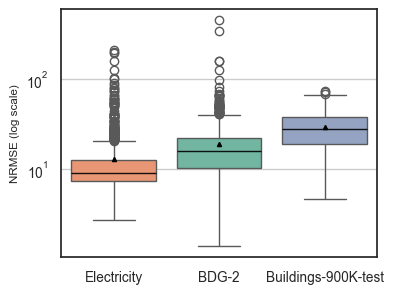

In [10]:
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt

rc = {
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.family':'serif',
      'font.size' : 12}
plt.rcParams.update(rc)

#seaborn.set(style='whitegrid')
seaborn.set(style='white', font_scale=0.7)


plt.figure(figsize=(4, 3))
# date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 12})
# plt.rcParams["font.family"] = "serif"


test_agg1 = combined.copy()
#map_names = {'BDG-2-50epoch': 'BDG-2', 'Electricity-50epoch': 'Electricity', 'Buildings-900K-test-50epoch': 'Buildings-900K-test'}
#test_agg1['dataset'] = test_agg1['dataset'].map(map_names)

test_agg1.NRMSE = test_agg1.NRMSE * 100
#test_agg1['building_type'] = test_agg1.building.apply(lambda s: s.split('_')[1])
#test_agg1['site'] = test_agg1.building.apply(lambda s: s.split('_')[0])
#test_agg1.building_type = test_agg1.building_type.str.capitalize()

# Find the order
my_order = test_agg1.groupby(by=["dataset"])["NRMSE"].median().sort_values().index
print(my_order)

res = seaborn.boxplot(x='dataset', y='NRMSE', fill=True, hue='dataset',
                      order=my_order,                       
                medianprops=dict(color="black", alpha=0.9),
                      showmeans=True,
                meanprops={
                       "markeredgecolor": "black",
                       "markersize": "3",
                'markerfacecolor':'black'},
                      palette='Set2',
                data=test_agg1,
                     legend=False)
res.tick_params(labelsize=9.8)
res.set_yscale('log')

plt.title(label='')

plt.ylabel("NRMSE (log scale)")
# plt.ylim(0,120)
plt.xlabel("")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
sns.despine(fig=None, ax=None, top=False, right=False, left=False, bottom=False, offset=None, trim=False)
#plt.legend()
# plt.savefig("chronos-nrmse-error-commercial-dataset-boxplot.pdf", bbox_inches='tight')
plt.show()

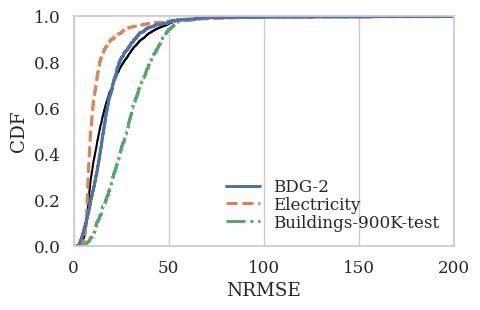

In [12]:
sns.set(style="whitegrid", font_scale=1.1)  # crazy big
# sns.set_theme(style="whitegrid")

date_formater = mdates.DateFormatter('%b, %d')
# plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"
plt.rcParams["figure.figsize"] = (5, 3.3)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.figure(figsize=(3, 3))
fig, ax = plt.subplots()

copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)


#assembly_df
all_df['cdf'] = all_df.rank(method = 'average', pct = True)
# ax1 = all_df.sort_values('NRMSE').plot(x = 'NRMSE', y = 'cdf', grid = True, color='black', ax=ax)
ax_c = seaborn.ecdfplot(data=all_df.sort_values('NRMSE'), x="NRMSE", ax=ax, color='black')
# median = all_df.sort_values('NRMSE').quantile(0.5)
# plt.scatter(x = median['NRMSE'], y = median['cdf'], color = 'red')
# #plt.text(x = xmedian['NRMSE'], median['cdf'])
# plt.text(median['NRMSE'],  median['cdf'], '({}, {})'.format(median['NRMSE'].round(2),  median['cdf'].round(2)))
# q_25 = all_df.sort_values('NRMSE').quantile(0.25)
# plt.scatter(x = q_25['NRMSE'], y = q_25['cdf'], color = 'red')
# plt.text(q_25['NRMSE'],  q_25['cdf'], '({}, {})'.format(q_25['NRMSE'].round(2),  q_25['cdf'].round(2)))
# q_75 = all_df.sort_values('NRMSE').quantile(0.75)
# plt.scatter(x = q_75['NRMSE'], y = q_75['cdf'], color = 'red')
# plt.text(q_75['NRMSE'],  q_75['cdf'], '({}, {})'.format(q_75['NRMSE'].round(2),  q_75['cdf'].round(2)))
# q_90 = all_df.sort_values('NRMSE').quantile(0.9)
# plt.scatter(x = q_90['NRMSE'], y = q_90['cdf'], color = 'red')
# plt.text(q_90['NRMSE'],  q_90['cdf'], '({}, {})'.format(q_90['NRMSE'].round(2),  q_90['cdf'].round(2)))
copy_df = test_agg.reset_index()
copy_df['NRMSE'] = copy_df['NRMSE'] * 100
copy_df = copy_df.sort_values('NRMSE')
# name = ['Mean', 'Buildings-900K-test', 'Electricity', 'BDG-2']
ax_s = seaborn.ecdfplot(data=copy_df, x="NRMSE", hue='dataset', ax=ax, lw=2.15)


for lines, linestyle, legend_handle in zip(ax.lines[::-1], ['-', '--', 'dashdot'], ax.legend_.legendHandles):
    lines.set_linestyle(linestyle)
    legend_handle.set_linestyle(linestyle)

#plt.xlim(0,80)
# ax_s.set_xscale(value='log')
ax_s.set_xlim(0,200)
# ax_s.legend(labels=name)
sns.move_legend(ax, "lower right", title='', labelspacing=0.05, frameon=False)
plt.title(label='')

plt.ylabel("CDF")
#plt.ylim(0,125)
# plt.xlim(0,200)
plt.xlabel("NRMSE")
#plt.xticks(rotation=90)
plt.grid(axis='y')
plt.gcf().tight_layout()
#plt.legend()
plt.subplots_adjust(wspace=0.05, hspace=0)
plt.savefig("chronos-commercial-error-cdfplot.pdf", bbox_inches='tight')
plt.show()

In [34]:
copy_df1 = copy_df[['dataset', 'NRMSE']]
#seaborn.ecdfplot(data=copy_df1, x="NRMSE", hue='dataset')

copy_df1.rank(method = 'average', pct = True)

,dataset,NRMSE
390,0.192541,0.000357
303,0.192541,0.000714
955,0.192541,0.001071
1018,0.192541,0.001428
1035,0.192541,0.001784
...,...,...
1993,0.793362,0.998572
1593,0.793362,0.998929
1674,0.793362,0.999286
969,0.192541,0.999643


In [54]:
test_agg[test_agg['NRMSE'] > 0.4].sort_values('NRMSE', ascending=False)

,result_type,dataset,filename,building,RMSE,MSE,MAE,MAPE,SMAPE,NRMSE,SQL
25,agg_metrics,BDG-2,Fox_clean=2016.csv,Fox_assembly_Jerrod,11.515635,132.609853,4.614824,2.596419,0.411613,4.393452,3.237193
24,agg_metrics,BDG-2,Fox_clean=2017.csv,Fox_assembly_Jerrod,8.555997,73.205085,2.851412,1.524470,0.347545,3.376229,1.830636
83,agg_metrics,Electricity,LD2011_2014_clean=2012.csv,MT_093,41.644316,1734.249074,14.613220,1.489056,0.452343,2.098521,1.242034
2,agg_metrics,Electricity,LD2011_2014_clean=2012.csv,MT_003,14.937199,223.119902,4.498516,0.813042,0.213107,1.994462,0.851474
87,agg_metrics,Electricity,LD2011_2014_clean=2013.csv,MT_093,47.057759,2214.432658,17.748919,2.231866,0.478831,1.924672,1.261144
...,...,...,...,...,...,...,...,...,...,...,...
263,agg_metrics,Buildings-900K-test,G42000900.csv,347940,13.581361,184.453354,8.410877,0.319899,0.255767,0.405250,0.777886
25,agg_metrics,Buildings-900K-test,G51059305.csv,99053,10.627578,112.945410,6.054091,0.394182,0.238872,0.403627,0.967517
312,agg_metrics,Electricity,LD2011_2014_clean=2013.csv,MT_352,41.693935,1738.384236,21.169502,0.221605,0.206762,0.402950,0.898043
27,agg_metrics,Buildings-900K-test,G06000702.csv,124046,28.772846,827.876693,17.445271,0.441924,0.270127,0.402221,0.821625


In [25]:
test_agg[test_agg['dataset'] == 'BDG-2'].building.apply(lambda x: x.split('_')[0]).unique().shape

(4,)

In [22]:
test_agg[test_agg['dataset']=='Buildings-900K-test'].building.unique()

array([7022, 7726, 17902, 20517, 21373, 23150, 30430, 32014, 39333, 41862,
       43669, 45518, 55214, 59334, 61262, 65573, 77070, 80222, 91270,
       95950, 96085, 100270, 106702, 113166, 117501, 120189, 122357,
       124046, 125958, 126814, 127198, 133726, 141173, 143357, 144997,
       145774, 152798, 169749, 176622, 177461, 183509, 188166, 209582,
       212733, 215886, 216590, 217109, 218453, 230094, 235166, 245493,
       256253, 259965, 260789, 261742, 274822, 277973, 288654, 292878,
       293269, 295037, 297326, 303101, 313845, 316078, 316213, 319902,
       323861, 325070, 331630, 341525, 349358, 1484, 3191, 7223, 7607,
       8540, 10220, 16780, 18028, 18412, 23031, 24471, 27815, 32183,
       34215, 43148, 44908, 45431, 46871, 47308, 51468, 52972, 53623,
       58007, 60748, 62775, 64652, 68791, 70860, 76023, 77591, 77964,
       79596, 84343, 85655, 87788, 91404, 93367, 95564, 99383, 99767,
       101356, 101724, 105548, 106615, 114284, 114807, 115191, 116247,
       119

In [42]:
grouped = test_agg[test_agg['NRMSE'] > 0.5].sort_values('NRMSE', ascending=False).groupby('dataset')

In [45]:
for dataset in test_agg.dataset.unique():
    print(dataset, grouped.get_group(dataset).building.unique().shape)

BDG-2 (17,)
Electricity (14,)
Buildings-900K-test (33,)


In [44]:
grouped.get_group('Buildings-900K-test').building.unique().shape

(33,)

In [27]:
er = pd.read_csv('/home/user/BuildingsBenchNREL/BuildingsBenchData/BuildingsBench/BDG-2/Fox_clean=2017.csv', index_col=0, parse_dates=True)
er['Fox_assembly_Jerrod'].to_csv("Fox_Jerrod.csv")

In [17]:
# all_df[all_df['cdf'].round(3) == all_df['cdf'].round(3).quantile(0.75)]
copy_df = test_agg['NRMSE'].reset_index()
all_df = pd.DataFrame(copy_df['NRMSE'] * 100)

,index,NRMSE
0,0,73.6844
1,100,8.0815
2,200,12.2063
3,300,9.7417
4,400,13.9391
...,...,...
2313,32600,59.0719
2314,32700,11.1243
2315,32800,29.6892
2316,32900,7.7273
